In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
#import statesmodel.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('D:/advert.csv')

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='sales'>

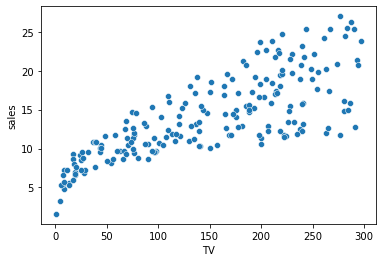

In [6]:
sns.scatterplot(data=data,x="TV",y="sales")

<AxesSubplot:xlabel='radio', ylabel='sales'>

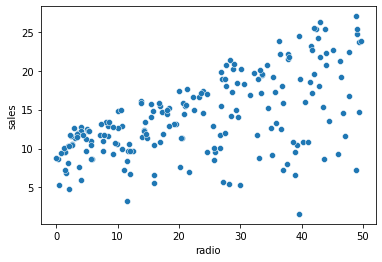

In [7]:
sns.scatterplot(data=data,x="radio",y="sales")

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

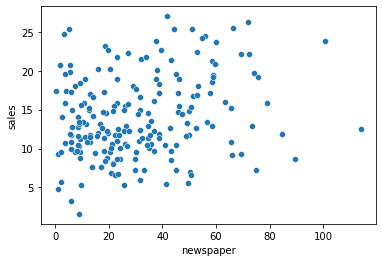

In [8]:
sns.scatterplot(data=data,x="newspaper",y="sales")

In [9]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

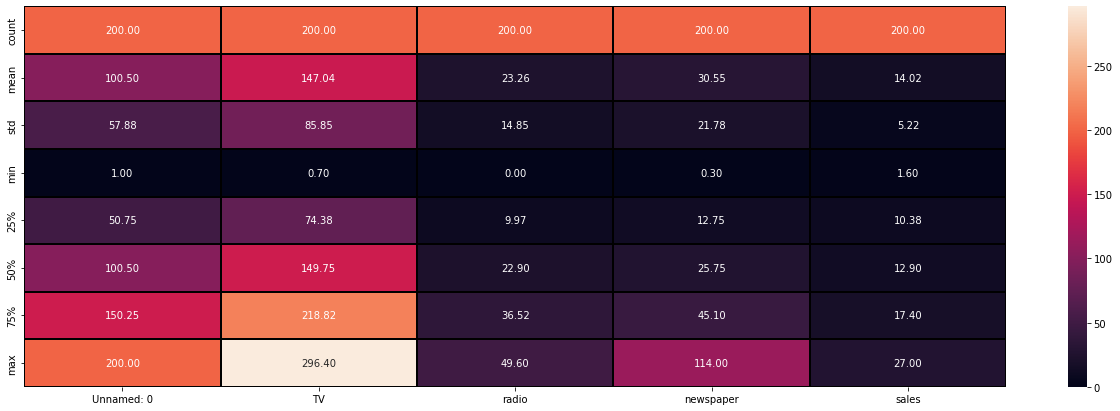

In [11]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [12]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


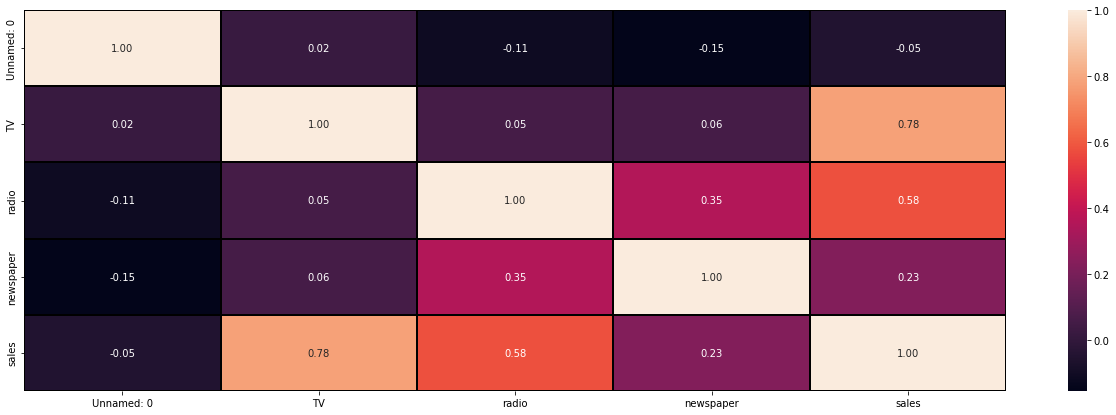

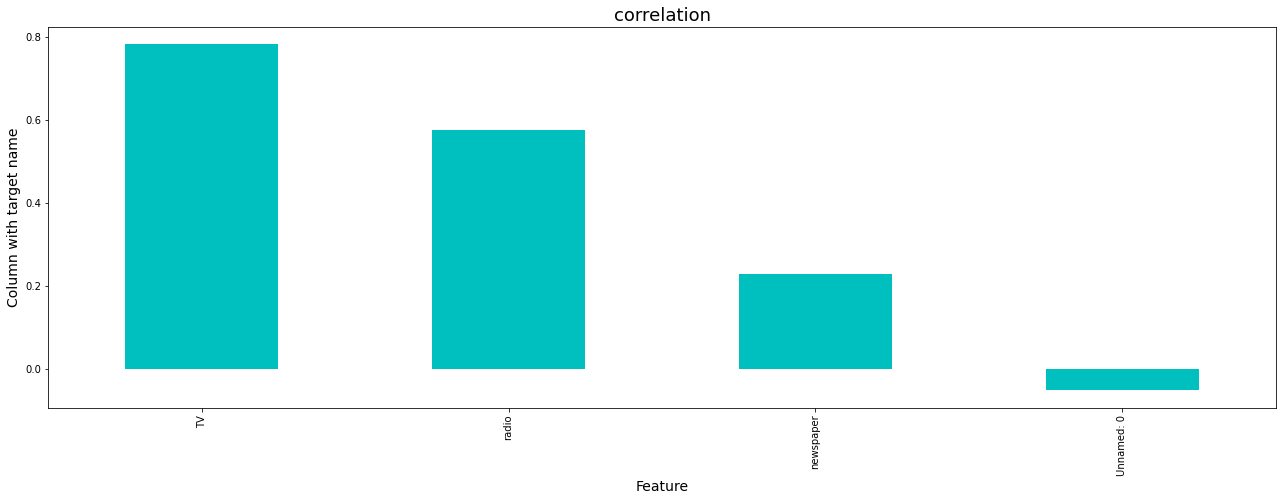

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

plt.figure(figsize=(22,7))
data.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

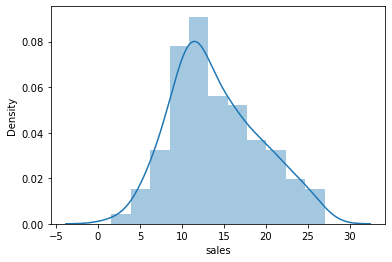

In [22]:
import seaborn as sns
sns.distplot(data['sales'],kde=True)

<AxesSubplot:xlabel='TV', ylabel='Density'>

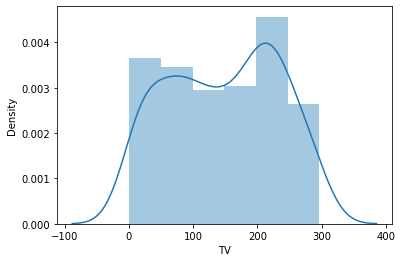

In [23]:
import seaborn as sns
sns.distplot(data['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Density'>

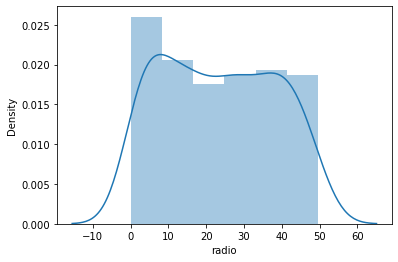

In [24]:
import seaborn as sns
sns.distplot(data['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

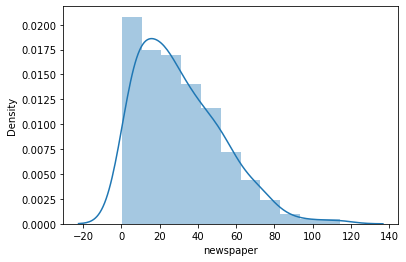

In [25]:
import seaborn as sns
sns.distplot(data['newspaper'],kde=True)

In [30]:

data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

<AxesSubplot:>

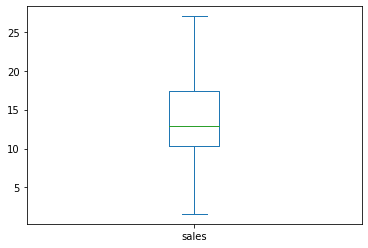

In [31]:
data['sales'].plot.box()

<AxesSubplot:>

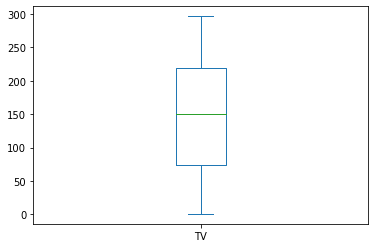

In [32]:
data['TV'].plot.box()

<AxesSubplot:>

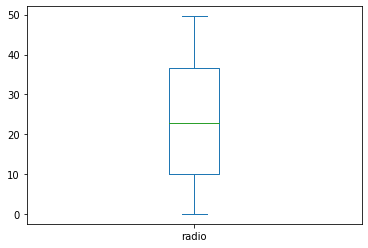

In [33]:
data['radio'].plot.box()

<AxesSubplot:>

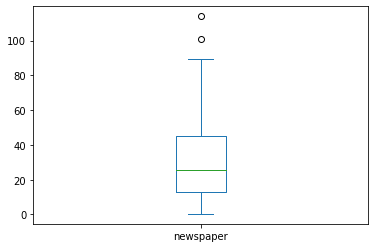

In [34]:
data['newspaper'].plot.box()

In [40]:
data.shape

features =data.drop("sales",axis=1)
target=data["sales"]

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9073274552252846
At random state 0,the testing accuracy is:- 0.856480214327925


At random state 1,the training accuracy is:- 0.8959391993971187
At random state 1,the testing accuracy is:- 0.8928781912093181


At random state 2,the training accuracy is:- 0.9152614531156523
At random state 2,the testing accuracy is:- 0.7570326409482367


At random state 3,the training accuracy is:- 0.8931443451313652
At random state 3,the testing accuracy is:- 0.9134449674582059


At random state 4,the training accuracy is:- 0.8911682084041699
At random state 4,the testing accuracy is:- 0.9084934434517352


At random state 5,the training accuracy is:- 0.89570620107301
At random state 5,the testing accuracy is:- 0.89851958363058


At random state 6,the training accuracy is:- 0.8915582028345674
At random state 6,the testing accuracy is:- 0.921941222913581


At random state 7,the training accuracy is:- 0.8929171093102488
At random state 7,the testing accuracy 

In [45]:
lr.fit(features_train,target_train)

LinearRegression()

In [46]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=57)

In [47]:
pred_test=lr.predict(features_test)

In [48]:
print(r2_score(target_test,pred_test))

0.9451596033809792


In [49]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print (f" At cross fold {j} the cv score is {cv_mean} and the accuracy score for the training is {Train_accuracy} and for the testing is {Test_accuracy}")
    print("\n")

 At cross fold 2 the cv score is 0.8557808905096393 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 3 the cv score is 0.8913539823868294 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 4 the cv score is 0.8858779626590163 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 5 the cv score is 0.8842777844741689 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 6 the cv score is 0.8877823078964706 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 7 the cv score is 0.8830284351379021 and the accuracy score for the training is -0.8073942271565175 and for the testing is 0.9451596033809792


 At cross fold 8 the cv score is 0.87950593473

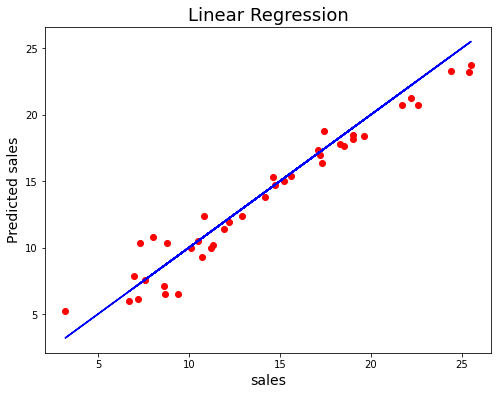

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [52]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [53]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls =ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.9412955867165456

In [54]:
cv_score =cross_val_score(ls,features,target,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.8812459618042253

In [55]:
#Ensemble Technique

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf= RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [56]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")

In [57]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decison = rf.predict(features_test)

rfs = r2_score(target_test,pred_decison)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=8)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.50746709587098
Cross Val Score: 97.38389041334428


In [60]:
import pickle 
filename ='ps.pkl'
pickle.dump(rf,open(filename,'wb'))

In [61]:
loaded_model=pickle.load(open('ps.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.9850746709587098


In [62]:
conclusion =pd.DataFrame([loaded_model.predict(features_test)[:],pred_decison[:]],index=["predicted","original"])

In [63]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,22.613,14.848,9.078,13.637,18.359,18.804,10.787,12.881,18.642,9.046,...,17.979,22.02,5.895,14.166,17.534,9.43,15.477,15.912,18.441,24.19
original,22.613,14.848,9.078,13.637,18.359,18.804,10.787,12.881,18.642,9.046,...,17.979,22.02,5.895,14.166,17.534,9.43,15.477,15.912,18.441,24.19
